# Stroke Prediction EDA
blbllblalbalb we will be using sny-thethic data and rel world adata that was derived from it blblbllbaşlalblab

### Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



### Reading the data

In [6]:
reaL_world_df_path = os.path.abspath('data/real-world-data/healthcare-dataset-stroke-data.csv')
synthetic_df_root_path = os.path.abspath('data/synthetic-data/')
synthetic_df_path = os.path.join(synthetic_df_root_path, 'train.csv')

In [7]:
real_world_data_df = pd.read_csv(reaL_world_df_path)
synthetic_data_df = pd.read_csv(synthetic_df_path)
print("Real Word Data Shape: ", real_world_data_df.shape)
print("Synthetic Data Shape: ", synthetic_data_df.shape)

Real Word Data Shape:  (5110, 12)
Synthetic Data Shape:  (15304, 12)


In [8]:
real_world_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
synthetic_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [10]:
real_world_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
synthetic_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [12]:
real_world_data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
synthetic_data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


Our dataframes look similar in terms of data types and data points. We don't need to worry about a column not existing in another

In [ ]:
df = pd.concat([synthetic_data_df, real_world_data_df], ignore_index=True, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

Summary of the concatenated dataframe:

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### Missing Data

In [14]:
print(f"Count of missing values in synthetic data:\n {synthetic_data_df.isnull().sum()}")
print(f"Count of missing values in real world data:\n {real_world_data_df.isnull().sum()}")

Count of missing values in synthetic data:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Count of missing values in real world data:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Our artificial data doesn't have any missing values as expected, however the real world data has 201 missing values in the `bmi` column. There are many ways to deal with missing values. One can simply drop these records, fill the blanks with the mean, the median, use an imputer, or even use a machine learning technique such as Decision Tree to predict the missing BMI.

From our research, we conclude that predicting the missing values seems like our best option. However, since we already have an artificially created dataframe, we have concerns about how further "artificializing" our data may effect our model. Therefore, we are going to use multiple approaches and experiment with out data. 

### Insight:
    Data from `bmi` feature is missing.
    Both Categorical and numerical features are present.
        Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
        Binary Numerical Features: hypertension,heart_disease, stroke
        Continous Numerical Features: age, avg_glucose_level, bmi
    Most of the data is categorical which need a special attention to visulaize those
    Feature extraction can be done by binning the continous features (age, sugar level, and bmi).


## Missing Values

The only missing value is BMI. 

### Using a Decision Tree to predict the missing BMI

In [35]:
# https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data
dt_df = df.copy()
DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = dt_df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(missing[['age','gender']]),index=missing.index)
dt_df.loc[missing.index,'bmi'] = predicted_bmi

print('Missing values after decision tree regressor: ',sum(dt_df.isnull().sum()))

Missing values after decision tree regressor:  0


### Using a Simple Imputer

In [39]:
imputed_df = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
imputed_df['bmi'] = mean_imputer.fit_transform(imputed_df['bmi'].values.reshape(-1,1))
print('Missing values after imputing: ',sum(imputed_df.isnull().sum()))


Missing values after imputing:  0


In [53]:
categorical = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
binary = ["hypertension", "heart_disease", "stroke"] # Basically, categorical values with only 2 values. 1 or 0
continous_numerical = ["age", "avg_glucose_level", "bmi"]

In [54]:
for col in categorical:
    print(f"{col} : {df[col].unique()}")

gender : ['Male' 'Female' 'Other']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


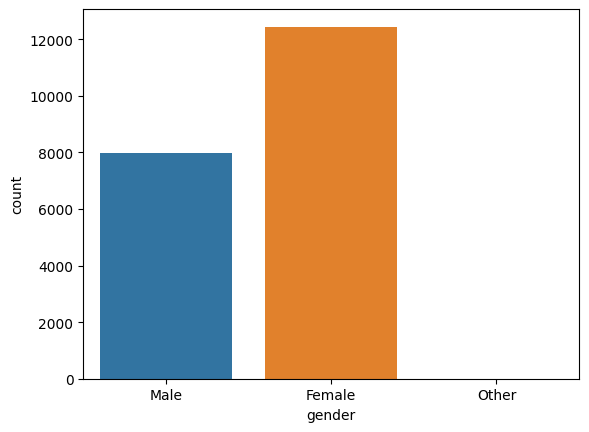

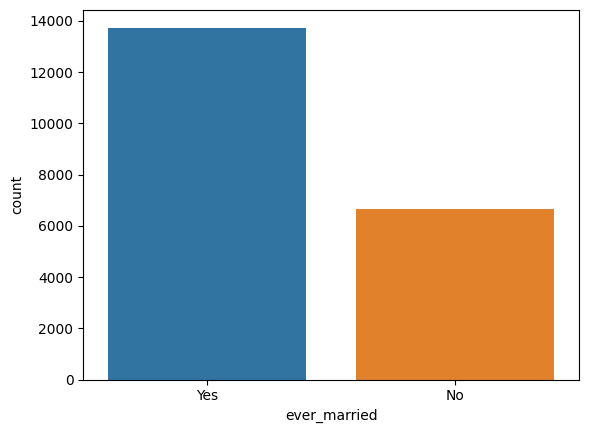

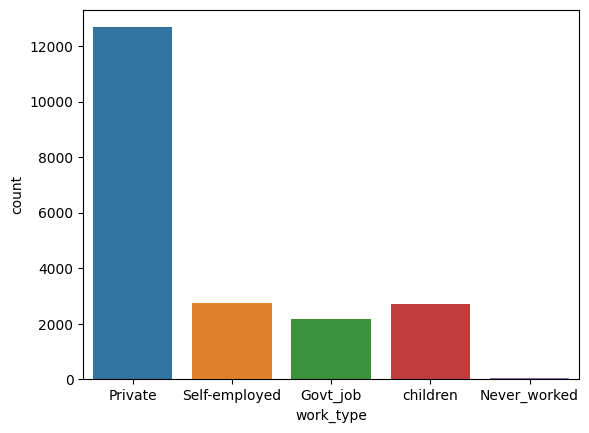

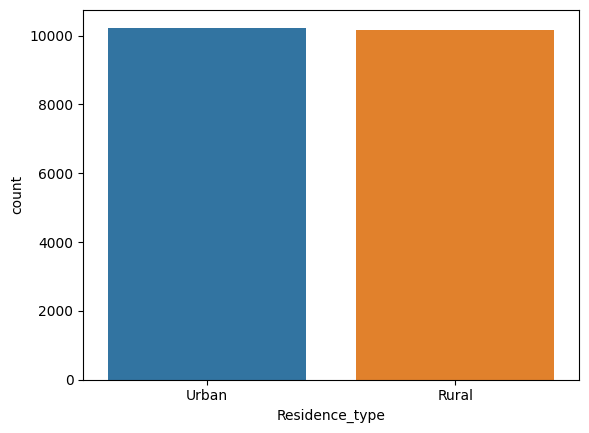

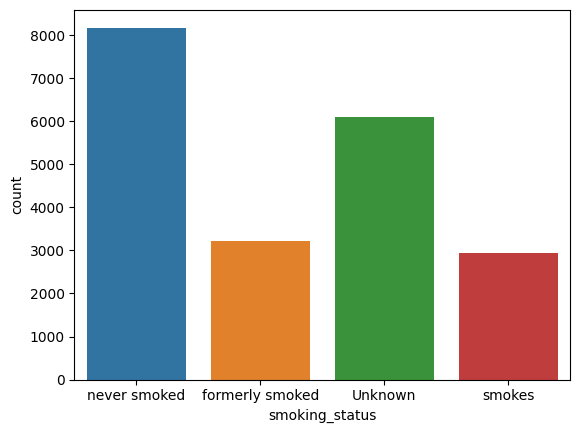

In [61]:
for c_feature in categorical:
    sns.countplot(data=df, x=c_feature)
    plt.show()

It doesn't seem like there is many "Other"s in `gender` or "Never_worked"s in `work_type`

In [76]:
df.loc[df["gender"]=="Other"].shape[0]

2

There is only 2 "Other"s in gender 

In [75]:
df.loc[df["work_type"]=="Never_worked"].shape[0]

64

### Visualization